In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
#Polynomial regression 
#step 1=> Decide the degree or if you just want the interaction term?
#step 2=> Convert the existing feature to new poly feature dataset using PolynomialFeature()
#step 3=> fit() and transform() to get new dataset with poly features
#step 4=> similar to linear regression perform the ml algo

In [3]:
X=df.drop("sales",axis=1);
y=df["sales"]

In [4]:
from sklearn.preprocessing import PolynomialFeatures

#note: If we leave degree=1 and include_bias=False, we will get the same data
#so we can just change the value of degree and test for higher degrees and compare the performance using a loop

In [5]:
#doing feature engineering for degree=2 in seperation (Method 1)
poly_convertor= PolynomialFeatures(degree=2,include_bias=False)
poly_convertor.fit(X)
converted_features=poly_convertor.transform(X)
converted_features.shape

(200, 9)

In [6]:
#doing feature engineering for degree=2 in oneline (Method 2)
converted_features2=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)
converted_features2.shape

(200, 9)

In [7]:
#Note: we will have to save this convertor function so that we can transform our data while
#we are giving model new data while predicting

In [8]:
# now similar to what we did for liner regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(converted_features, y, test_size=0.33, random_state=101)
#keeping the test_size and random state same so that we can compare between models and see how the models works

In [9]:
from sklearn.linear_model import LinearRegression

my_model=LinearRegression()
my_model.fit(X_train,y_train)
my_model.predict(X_test)

array([13.97204613, 19.31163632, 12.34937446, 16.77918795,  7.86585082,
        6.91555804, 20.11299294, 17.49707854, 10.56626076, 20.12510306,
        9.45653268, 14.08673516, 12.06855682, 23.37172536, 19.67600099,
        9.14838427, 12.13661295,  9.25938961,  8.42727726, 21.64817709,
        7.0207988 , 19.36930318, 27.21526812, 24.54515558,  8.98640103,
       11.86761484, 20.38278449,  9.22102483, 12.76121768,  8.64739673,
        8.67463214, 20.20034879, 10.93174941,  6.85739529, 18.29226844,
        9.5074497 , 10.35219229,  9.64459655,  7.4384789 , 11.03480643,
       12.66080843, 10.69057937, 11.23958513,  7.4725002 , 11.38637684,
       10.2667274 ,  6.12707279, 15.54892762, 13.43339421, 22.70762962,
       10.41887348, 13.24665286, 14.2399427 , 11.85682389, 11.71631169,
        5.5519889 , 25.01544605,  9.5463153 , 17.34861031, 15.7728373 ,
       15.51033662, 25.57307088,  8.60367331, 21.60788857, 12.34127765,
       22.21531611])

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#df["sales"].mean()


MAE=mean_absolute_error(y_test,my_model.predict(X_test))
MSE=mean_squared_error(y_test,my_model.predict(X_test))
RMSE=np.sqrt(mean_squared_error(y_test,my_model.predict(X_test)))
print(f"For degree=2   MAE: {MAE} MSE: {MSE} RMSE: {RMSE}")

For degree=2   MAE: 0.4842810535215653 MSE: 0.4202814842156953 RMSE: 0.6482912032533645


For degree=1  MAE: 1.236918849425931 MSE: 2.3483752427138262 RMSE: 1.5324409426512418

In [11]:
# we can see that error for degree 2 is way less than degree 1 stating that degree 2 model is a better fit,
# we will be checking it for higher degree to compare error rate
# note: We can't determaine if the higher degree will give a better result or not, we will have to try and test

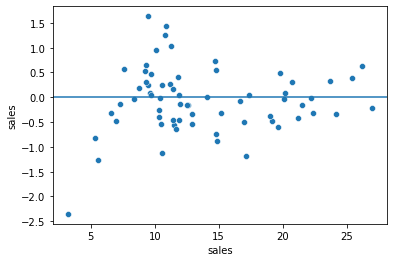

In [12]:
# performing Residual plotting
test_prediction=(my_model.predict(X_test))
test_res=y_test-test_prediction
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0)

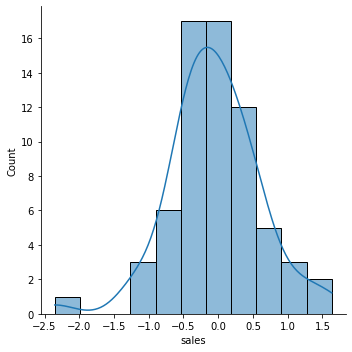

In [13]:
#Residual dist plot
sns.displot(test_res,kde=True)

In [14]:
#Final model fit with all the data

final_model=LinearRegression()
final_model.fit(converted_features,y)
final_model.coef_

array([ 5.16525487e-02,  2.10742970e-02,  6.88373531e-03, -1.09702663e-04,
        1.10525949e-03, -4.55155391e-05,  1.11997015e-04,  8.26605896e-05,
        1.19125650e-05])

Text(0.5, 1.0, 'Newspaper spend')

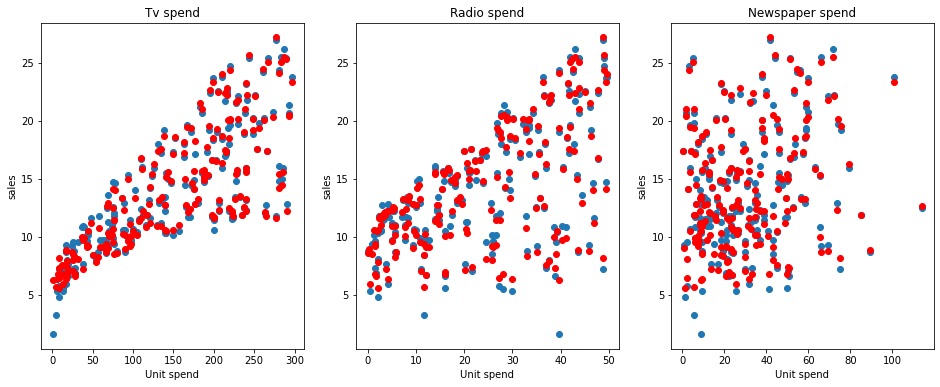

In [15]:
# plotting the actual results label and our model prediction
y_hat=final_model.predict(converted_features)

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df["TV"],df['sales'],'o')
axes[0].plot(df["TV"],y_hat,'o',color='r')
axes[0].set_ylabel("sales")
axes[0].set_xlabel("Unit spend")
axes[0].set_title("Tv spend")

axes[1].plot(df["radio"],df['sales'],'o')
axes[1].plot(df["radio"],y_hat,'o',color='r')
axes[1].set_ylabel("sales")
axes[1].set_xlabel("Unit spend")
axes[1].set_title("Radio spend")

axes[2].plot(df["newspaper"],df['sales'],'o')
axes[2].plot(df["newspaper"],y_hat,'o',color='r')
axes[2].set_ylabel("sales")
axes[2].set_xlabel("Unit spend")
axes[2].set_title("Newspaper spend")

In [16]:
# we can see that the original value is very near to predicted value

In [17]:
# Now we will compare the different model complexity (from degree=1 to degree=10)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

RMSE_train_error=[]
RMSE_test_error=[]

for i in range(1,11):
    converted_features=PolynomialFeatures(degree=i,include_bias=False).fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(converted_features, y, test_size=0.33, random_state=101)
    
    my_model=LinearRegression()
    my_model.fit(X_train,y_train)
    test_prediction=my_model.predict(X_test)
    train_prediction=my_model.predict(X_train)
    
    
    RMSE_test_error.append(np.sqrt(mean_squared_error(y_test,test_prediction)))
    RMSE_train_error.append(np.sqrt(mean_squared_error(y_train,train_prediction)))
    
print(f"RMSE of train error: {RMSE_train_error}\n")
print(f"RMSE of test error: {RMSE_test_error}")
    
    

RMSE of train error: [1.7376515982447711, 0.5947926597019146, 0.4405973423236363, 0.3532913282038105, 0.24845372693356269, 0.18834172906403576, 4.728732654517221, 0.15359255683107206, 0.15139845576780717, 0.16580945162261812]

RMSE of test error: [1.532440942651242, 0.6482912032533645, 0.5577254823372871, 0.5064297307320542, 2.357356329620026, 11.203912060397753, 1176.3898384706538, 3311.970057199749, 142167.90873987533, 3597834.307366623]


In [18]:
#we can see that train error is almost decreasing with higher degree with few exception.
#but the test error decreased evantually but then started to rise again as the degree increased, implying overfit

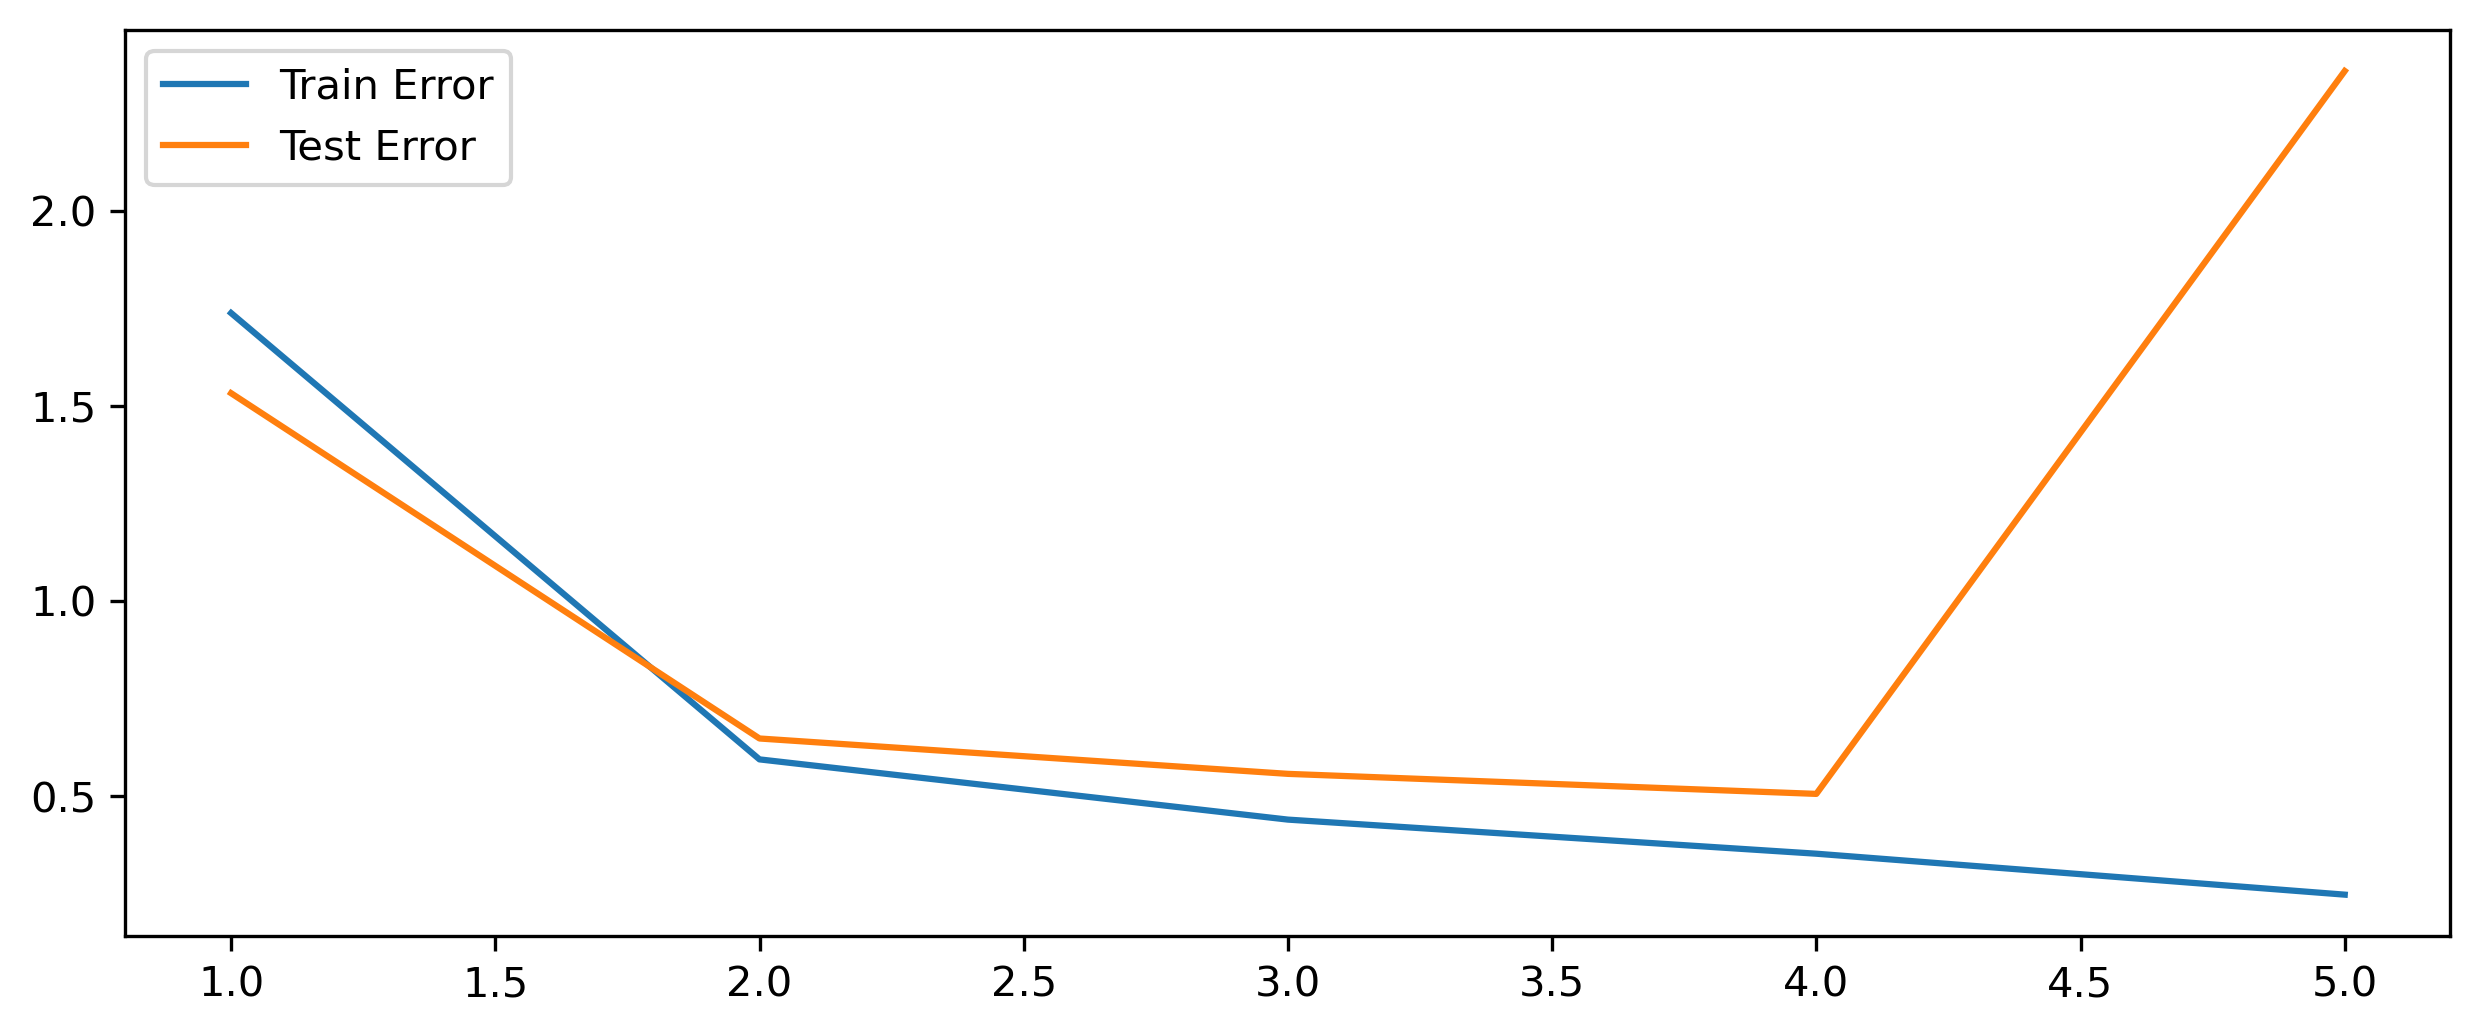

In [29]:
#to see what is the cutoff point, we can plot the degree vs train error and test error
plt.figure(figsize=(10,4),dpi=300)
plt.plot(np.arange(1,6,1),RMSE_train_error[:5],label="Train Error")
plt.plot(np.arange(1,6,1),RMSE_test_error[:5],label="Test Error")
plt.legend()


In [20]:
#we can clearly see that at degree=4 the test shows high error, so it's upto us to decide which degree is best, 
#we can either go with degree 2 or degree 3, we try to keep the degree(complexity as low as possible and only 
#increase complexity if it is resulting in high better performance). Here moving from degree=2 to degree=3 is 
#not giving us much better results. So we will go with degree to for our final model

In [35]:
#exporting model
from joblib import dump,load


final_model=LinearRegression()
converted_features=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

final_model.fit(converted_features,y)

dump(final_model,"finalPolymodel.jobfit")


final_converted_features=PolynomialFeatures(degree=2,include_bias=False)

dump(final_converted_features,"final_converted_features.jobfit")
#we will have to use this too while passing new data to our model

['final_converted_features.jobfit']

In [36]:
#importing and using model
from joblib import dump,load
my_imported_model=load("finalPolymodel.jobfit")
my_final_converted_features=load("final_converted_features.jobfit")

In [37]:
data=[[150,40,80]]
converted_data=my_final_converted_features.fit_transform(data)
my_imported_model.predict(converted_data)

array([18.36334478])

<AxesSubplot:ylabel='sales'>

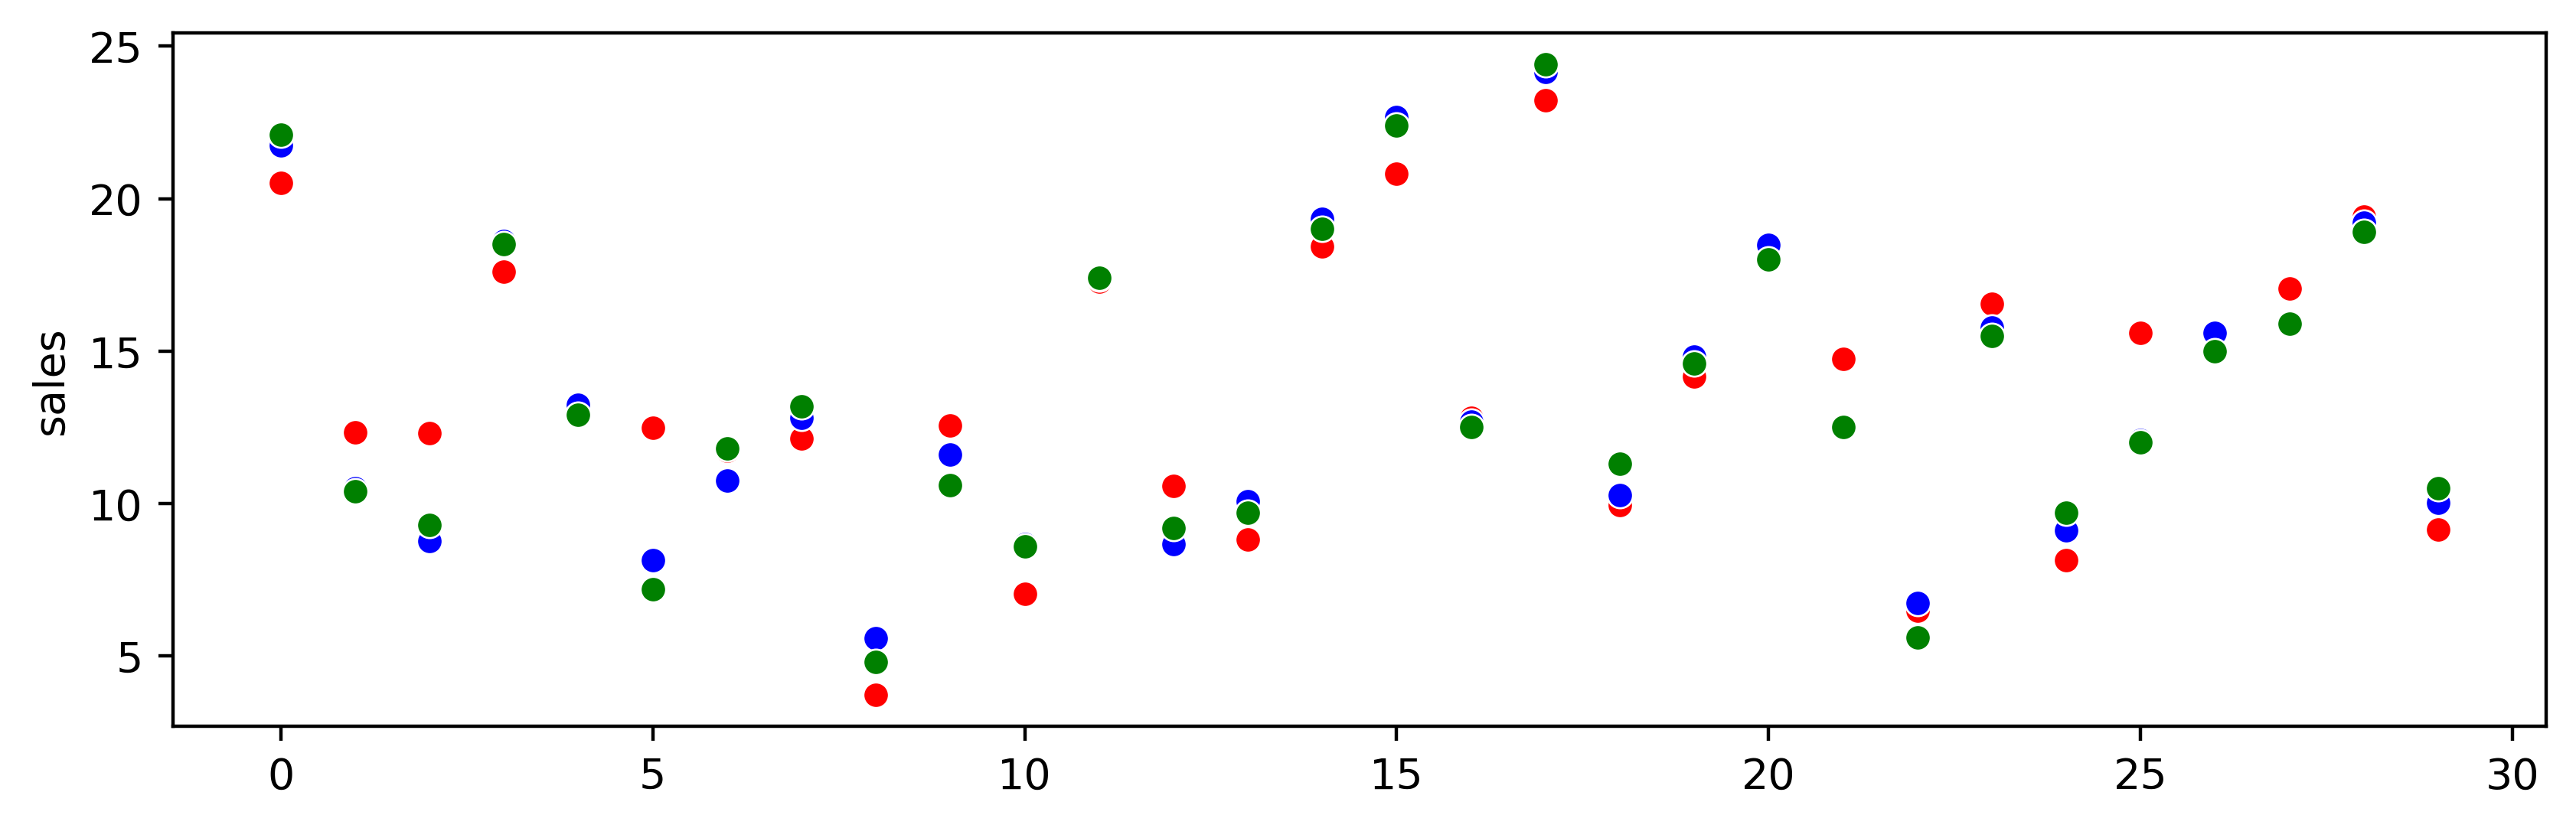

In [49]:
#comparing our previously created model and new model
from joblib import dump,load
first_model=load("LR_Ad-sale_data.joblib")
second_model=load("finalPolymodel.jobfit")
second_model_convertor=load("final_converted_features.jobfit")

#We will do two scatter plot test
#test1 giving original data to both ie X and we have the solution to it already as y

first_prediction=first_model.predict(X)
second_prediction=second_model.predict(second_model_convertor.fit_transform(X))


plt.figure(figsize=(10,3), dpi=400)
sns.scatterplot(data=first_prediction[:30],color="red")
sns.scatterplot(data=second_prediction[:30],color="blue")
sns.scatterplot(data=y[:30],color="green")
